# This notbook will process the original Dataset (CodeSearchNet-Java)
## after processing , the dataset will have five new columns
## "Complexity","LineNumber","Methodlength","LLratio","StringPercentage"

### these columns will used to clean the oringinal dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import time
import os,jpype
import json_lines
from tqdm import tqdm

In [2]:
# the code analystic tool path
jarpath = "../DataAnalysticTool/JavaCodeRegulator.jar"
# Original Datapath
data_path ="../OriginalDataSet/java/final/jsonl/"
# Output result path
output_path="./"

In [3]:
jpype.startJVM(jpype.getDefaultJVMPath(), "-ea", "-Djava.class.path=%s" % jarpath)

In [4]:
JavaCodeRegulator = jpype.JClass('com.sc21gx.JavaCodeRegulator.ASTUtil')

In [5]:
files = os.listdir(data_path )

In [6]:
def remove_special(str1):
    return "".join([x for x in str1 if ord(x)<=127 and ord(x)>=0])
result = list()
with open(data_path+"train/java_train_0.jsonl", 'rb') as f: 
    for item in json_lines.reader(f):
        result.append(item );
df =pd.DataFrame(result)

path=data_path +"valid/java_valid_0.jsonl"
result = list()
with open(path, 'rb') as f: 
    for item in json_lines.reader(f):
        result.append(item )
val=pd.DataFrame(result)
df["code"] =df["code"].apply(lambda x: remove_special(x))
val["code"] =val["code"].apply(lambda x: remove_special(x))
print(str(len(val))+"\n"+str(len(df)))

15328
30000


In [7]:
def read_dataset(path):
    result = list()
    with open(path, 'rb') as f: 
        for item in json_lines.reader(f):
            result.append(item )
    df=pd.DataFrame(result)
    return df

In [8]:
df.head(5)

repo  \
0  spring-projects/spring-boot   
1  spring-projects/spring-boot   
2  spring-projects/spring-boot   
3  spring-projects/spring-boot   
4  spring-projects/spring-boot   

                                                path  \
0  spring-boot-project/spring-boot/src/main/java/...   
1  spring-boot-project/spring-boot/src/main/java/...   
2  spring-boot-project/spring-boot/src/main/java/...   
3  spring-boot-project/spring-boot/src/main/java/...   
4  spring-boot-project/spring-boot/src/main/java/...   

                                           func_name  \
0                  IndexedElementsBinder.bindIndexed   
1  AbstractFilterRegistrationBean.setServletRegis...   
2  AbstractFilterRegistrationBean.addServletRegis...   
3     AbstractFilterRegistrationBean.setServletNames   
4     AbstractFilterRegistrationBean.addServletNames   

                                     original_string language  \
0  protected final void bindIndexed(Configuration...     java   
1  public void setServletRegistrationBeans(\n\t\t...     java   
2  public void addServletRegistrationBeans(\n\t\t...     java   
3  public void setServletNames(Collection<String>...     java   
4  public void addServletNames(String... servletN...     java   

                                                code  \
0  protected final void bindIndexed(Configuration...   
1  public void setServletRegistrationBeans(\n\t\t...   
2  public void addServletRegistrationBeans(\n\t\t...   
3  public void setServletNames(Collection<String>...   
4  public void addServletNames(String... servletN...   

                                         code_tokens  \
0  [protected, final, void, bindIndexed, (, Confi...   
1  [public, void, setServletRegistrationBeans, (,...   
2  [public, void, addServletRegistrationBeans, (,...   
3  [public, void, setServletNames, (, Collection,...   
4  [public, void, addServletNames, (, String, ......   

                                           docstring  \
0  Bind indexed elements to the supplied collecti...   
1  Set {@link ServletRegistrationBean}s that the ...   
2  Add {@link ServletRegistrationBean}s for the f...   
3  Set servlet names that the filter will be regi...   
4  Add servlet names for the filter.\n@param serv...   

                                    docstring_tokens  \
0  [Bind, indexed, elements, to, the, supplied, c...   
1                                           [Set, {]   
2                                           [Add, {]   
3  [Set, servlet, names, that, the, filter, will,...   
4         [Add, servlet, names, for, the, filter, .]   

                                        sha  \
0  0b27f7c70e164b2b1a96477f1d9c1acba56790c1   
1  0b27f7c70e164b2b1a96477f1d9c1acba56790c1   
2  0b27f7c70e164b2b1a96477f1d9c1acba56790c1   
3  0b27f7c70e164b2b1a96477f1d9c1acba56790c1   
4  0b27f7c70e164b2b1a96477f1d9c1acba56790c1   

                                                 url partition  
0  https://github.com/spring-projects/spring-boot...     train  
1  https://github.com/spring-projects/spring-boot...     train  
2  https://github.com/spring-projects/spring-boot...     train  
3  https://github.com/spring-projects/spring-boot...     train  
4  https://github.com/spring-projects/spring-boot...     train

In [9]:
print(df["original_string"][0])

protected final void bindIndexed(ConfigurationPropertyName name, Bindable<?> target,
			AggregateElementBinder elementBinder, ResolvableType aggregateType,
			ResolvableType elementType, IndexedCollectionSupplier result) {
		for (ConfigurationPropertySource source : getContext().getSources()) {
			bindIndexed(source, name, target, elementBinder, result, aggregateType,
					elementType);
			if (result.wasSupplied() && result.get() != null) {
				return;
			}
		}
	}


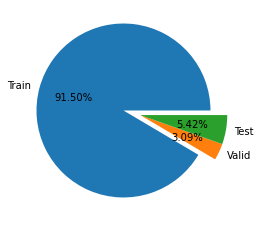

In [10]:
y = np.array([454451,15328,26909])
plt.pie(y,labels=["Train","Valid","Test"],explode=(0.2,0,0), autopct='%.2f%%',)
plt.show()

In [11]:
val.head(5)

repo                                               path  \
0  google/guava  guava/src/com/google/common/escape/ArrayBasedU...   
1  google/guava  guava/src/com/google/common/escape/ArrayBasedU...   
2  google/guava  guava/src/com/google/common/escape/ArrayBasedU...   
3  google/guava  android/guava/src/com/google/common/io/CharSou...   
4  google/guava  android/guava/src/com/google/common/io/CharSou...   

                                  func_name  \
0           ArrayBasedUnicodeEscaper.escape   
1           ArrayBasedUnicodeEscaper.escape   
2  ArrayBasedUnicodeEscaper.nextEscapeIndex   
3             CharSource.openBufferedStream   
4                         CharSource.length   

                                     original_string language  \
0  @Override\n  public final String escape(String...     java   
1  @Override\n  protected final char[] escape(int...     java   
2  @Override\n  protected final int nextEscapeInd...     java   
3  public BufferedReader openBufferedStream() thr...     java   
4  @Beta\n  public long length() throws IOExcepti...     java   

                                                code  \
0  @Override\n  public final String escape(String...   
1  @Override\n  protected final char[] escape(int...   
2  @Override\n  protected final int nextEscapeInd...   
3  public BufferedReader openBufferedStream() thr...   
4  @Beta\n  public long length() throws IOExcepti...   

                                         code_tokens  \
0  [@, Override, public, final, String, escape, (...   
1  [@, Override, protected, final, char, [, ], es...   
2  [@, Override, protected, final, int, nextEscap...   
3  [public, BufferedReader, openBufferedStream, (...   
4  [@, Beta, public, long, length, (, ), throws, ...   

                                           docstring  \
0  /*\nThis is overridden to improve performance....   
1  Escapes a single Unicode code point using the ...   
2                     /* Overridden for performance.   
3  Opens a new {@link BufferedReader} for reading...   
4  Returns the length of this source in chars, ev...   

                                    docstring_tokens  \
0  [/, *, This, is, overridden, to, improve, perf...   
1  [Escapes, a, single, Unicode, code, point, usi...   
2            [/, *, Overridden, for, performance, .]   
3  [Opens, a, new, {, @link, BufferedReader, }, f...   
4  [Returns, the, length, of, this, source, in, c...   

                                        sha  \
0  7155d12b70a2406fa84d94d4b8b3bc108e89abfd   
1  7155d12b70a2406fa84d94d4b8b3bc108e89abfd   
2  7155d12b70a2406fa84d94d4b8b3bc108e89abfd   
3  7155d12b70a2406fa84d94d4b8b3bc108e89abfd   
4  7155d12b70a2406fa84d94d4b8b3bc108e89abfd   

                                                 url partition  
0  https://github.com/google/guava/blob/7155d12b7...     valid  
1  https://github.com/google/guava/blob/7155d12b7...     valid  
2  https://github.com/google/guava/blob/7155d12b7...     valid  
3  https://github.com/google/guava/blob/7155d12b7...     valid  
4  https://github.com/google/guava/blob/7155d12b7...     valid

In [12]:
res= JavaCodeRegulator.tryFixMethod(val["code"][0]+"",3)
print(res)
allinfo=JavaCodeRegulator.getAllInfo(res)
print(allinfo)

@Override public final String escape(String s){
  checkNotNull(s);
  for (int i=0; i < s.length(); i++) {
    char c=s.charAt(i);
    if ((c < replacementsLength && replacements[c] != null) || c > safeMaxChar || c < safeMinChar) {
      return escapeSlow(s,i);
    }
  }
  return s;
}

{McconnellApproach=6, StringLength=0, MethodLineNumber=10, MethodLength=304}


In [13]:
#This jar file support these method：
#getMethodLength
#getMethodLineNumber
#getRegularMethod
#getRegularClass
#getAllInfo
#tryFixMethod
error= JavaCodeRegulator.getRegularMethod(val["code"][0]+"}")
res= JavaCodeRegulator.tryFixMethod(val["code"][0]+"",3)
length= JavaCodeRegulator.getMethodLength(res)
line= JavaCodeRegulator.getMethodLineNumber(res)
complexity=JavaCodeRegulator.getMcconnellApproach(res)
allinfo=JavaCodeRegulator.getAllInfo(res)
print(error)
print (res)
print (length)
print (line)
print(complexity)
print(allinfo)

Parser Error: 
Line:13:Syntax error on token "}", delete this token

@Override public final String escape(String s){
  checkNotNull(s);
  for (int i=0; i < s.length(); i++) {
    char c=s.charAt(i);
    if ((c < replacementsLength && replacements[c] != null) || c > safeMaxChar || c < safeMinChar) {
      return escapeSlow(s,i);
    }
  }
  return s;
}

304
10
6
{McconnellApproach=6, StringLength=0, MethodLineNumber=10, MethodLength=304}


In [14]:
def get_processed_dataset(df):
    dataset_df=pd.DataFrame(columns=["label","code","code_tokens"])
    dataset_count=pd.DataFrame(columns=["Original","Parsed","Fixed","Train", "Train-OPT",
                                        "Complexity","LineNumber","Methodlength",
                                        "LLratio","StringPercentage",
                                       "Input","Output"])
    i_parser_error =0
    i_fix_error =0
    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        parsed=JavaCodeRegulator.getRegularMethod(row["code"])
        fixed=parsed
        if( str(parsed).startswith("Parser Error")):
            i_parser_error +=1
            fixed=JavaCodeRegulator.tryFixMethod(row["code"],3)
        if( str(fixed).startswith("Fix failed")):
            i_fix_error +=1
        allinfo=JavaCodeRegulator.getAllInfo(fixed)
        complexity=int(allinfo.get("McconnellApproach"))
        lineNumber=allinfo.get("MethodLineNumber")
        methodlength =allinfo.get("MethodLength")
        srtinglength =allinfo.get("StringLength")
        ratio = methodlength/lineNumber
        slratio =  srtinglength/methodlength
        codeInfo=JavaCodeRegulator.getTestSet(fixed)
        
        dataDict={"Original": str(row["code"]) ,
                                        "Parsed": str(parsed) ,
                                        "Fixed": str(fixed) ,
                                         "Train": str(fixed)+ " <|endoftext|>",
                                         "Train-OPT": str(fixed)+ " </s>",
                                         "Complexity": int(complexity),
                                        "LineNumber":lineNumber,  
                                        "Methodlength": methodlength, 
                                        "LLratio": ratio,
                                        "StringPercentage":slratio,
                                        "Input": str(codeInfo.get("Input")) ,
                                        "Output": str(codeInfo.get("Output"))
                                       }
        current_df=pd.DataFrame(dataDict,index=[0]);
        dataset_count=pd.concat([dataset_count,current_df], ignore_index=True)
    
    print("Method Parser error:",i_parser_error)
    print("Method Fix error:",i_fix_error)
    print("Methods:",len(dataset_count))
    return dataset_count

In [15]:
dataset_count=get_processed_dataset(val)
dataset_count.to_csv(output_path+"java_code_valset_count.csv")

100%|██████████| 15328/15328 [02:16<00:00, 112.54it/s]


Method Parser error: 17
Method Fix error: 7
Methods: 15328


In [16]:
df=read_dataset(data_path +"test/java_test_0.jsonl")
df["code"] =df["code"].apply(lambda x: remove_special(x))
dataset_count=get_processed_dataset(df)
dataset_count.to_csv(output_path+"java_code_testset_count.csv")

100%|██████████| 26909/26909 [05:52<00:00, 76.24it/s] 


Method Parser error: 30
Method Fix error: 6
Methods: 26909


In [19]:
df=read_dataset(data_path +"train/java_train_0.jsonl")
df["code"] =df["code"].apply(lambda x: remove_special(x))
dataset_count=get_processed_dataset(df)
dataset_count.to_csv(output_path+"java_code_trainset_0_count.csv")

100%|██████████| 30000/30000 [07:04<00:00, 70.63it/s] 


Method Parser error: 52
Method Fix error: 24
Methods: 30000


In [20]:
df=read_dataset(data_path +"train/java_train_1.jsonl")
df["code"] =df["code"].apply(lambda x: remove_special(x))
dataset_count=get_processed_dataset(df)
dataset_count.to_csv(output_path+"java_code_trainset_1_count.csv")

100%|██████████| 30000/30000 [04:22<00:00, 114.33it/s]


Method Parser error: 20
Method Fix error: 10
Methods: 30000


In [21]:
df=read_dataset(data_path +"train/java_train_2.jsonl")
df["code"] =df["code"].apply(lambda x: remove_special(x))
dataset_count=get_processed_dataset(df)
dataset_count.to_csv(output_path+"java_code_trainset_2_count.csv")

100%|██████████| 30000/30000 [02:11<00:00, 228.09it/s]


Method Parser error: 14
Method Fix error: 6
Methods: 30000


In [22]:
df=read_dataset(data_path +"train/java_train_3.jsonl")
df["code"] =df["code"].apply(lambda x: remove_special(x))
dataset_count=get_processed_dataset(df)
dataset_count.to_csv(output_path+"java_code_trainset_3_count.csv")

100%|██████████| 30000/30000 [04:18<00:00, 116.25it/s]


Method Parser error: 36
Method Fix error: 13
Methods: 30000


In [23]:
df=read_dataset(data_path +"train/java_train_4.jsonl")
df["code"] =df["code"].apply(lambda x: remove_special(x))
dataset_count=get_processed_dataset(df)
dataset_count.to_csv(output_path+"java_code_trainset_4_count.csv")

100%|██████████| 30000/30000 [06:32<00:00, 76.38it/s] 


Method Parser error: 29
Method Fix error: 7
Methods: 30000


In [24]:
df=read_dataset(data_path +"train/java_train_5.jsonl")
df["code"] =df["code"].apply(lambda x: remove_special(x))
dataset_count=get_processed_dataset(df)
dataset_count.to_csv(output_path+"java_code_trainset_5_count.csv")

100%|██████████| 30000/30000 [06:42<00:00, 74.56it/s] 


Method Parser error: 19
Method Fix error: 7
Methods: 30000


In [25]:
df=read_dataset(data_path +"train/java_train_6.jsonl")
df["code"] =df["code"].apply(lambda x: remove_special(x))
dataset_count=get_processed_dataset(df)
dataset_count.to_csv(output_path+"java_code_trainset_6_count.csv")

100%|██████████| 30000/30000 [07:27<00:00, 67.08it/s]


Method Parser error: 33
Method Fix error: 8
Methods: 30000


In [26]:
df=read_dataset(data_path +"train/java_train_7.jsonl")
df["code"] =df["code"].apply(lambda x: remove_special(x))
dataset_count=get_processed_dataset(df)
dataset_count.to_csv(output_path+"java_code_trainset_7_count.csv")

100%|██████████| 30000/30000 [17:43<00:00, 28.21it/s]  


Method Parser error: 14
Method Fix error: 2
Methods: 30000


In [27]:
df=read_dataset(data_path +"train/java_train_8.jsonl")
df["code"] =df["code"].apply(lambda x: remove_special(x))
dataset_count=get_processed_dataset(df)
dataset_count.to_csv(output_path+"java_code_trainset_8_count.csv")

100%|██████████| 30000/30000 [14:33<00:00, 34.33it/s]  


Method Parser error: 48
Method Fix error: 8
Methods: 30000


In [28]:
df=read_dataset(data_path +"train/java_train_9.jsonl")
df["code"] =df["code"].apply(lambda x: remove_special(x))
dataset_count=get_processed_dataset(df)
dataset_count.to_csv(output_path+"java_code_trainset_9_count.csv")

100%|██████████| 30000/30000 [07:58<00:00, 62.72it/s]


Method Parser error: 32
Method Fix error: 8
Methods: 30000


In [29]:
df=read_dataset(data_path +"train/java_train_10.jsonl")
df["code"] =df["code"].apply(lambda x: remove_special(x))
dataset_count=get_processed_dataset(df)
dataset_count.to_csv(output_path+"java_code_trainset_10_count.csv")

100%|██████████| 30000/30000 [11:06<00:00, 45.02it/s] 


Method Parser error: 27
Method Fix error: 3
Methods: 30000


In [30]:
df=read_dataset(data_path +"train/java_train_11.jsonl")
df["code"] =df["code"].apply(lambda x: remove_special(x))
dataset_count=get_processed_dataset(df)
dataset_count.to_csv(output_path+"java_code_trainset_11_count.csv")

100%|██████████| 30000/30000 [06:45<00:00, 73.92it/s] 


Method Parser error: 41
Method Fix error: 10
Methods: 30000


In [31]:
df=read_dataset(data_path +"train/java_train_12.jsonl")
df["code"] =df["code"].apply(lambda x: remove_special(x))
dataset_count=get_processed_dataset(df)
dataset_count.to_csv(output_path+"java_code_trainset_12_count.csv")

100%|██████████| 30000/30000 [06:17<00:00, 79.52it/s] 


Method Parser error: 48
Method Fix error: 10
Methods: 30000


In [32]:
df=read_dataset(data_path +"train/java_train_13.jsonl")
df["code"] =df["code"].apply(lambda x: remove_special(x))
dataset_count=get_processed_dataset(df)
dataset_count.to_csv(output_path+"java_code_trainset_13_count.csv")

100%|██████████| 30000/30000 [06:47<00:00, 73.57it/s] 


Method Parser error: 33
Method Fix error: 9
Methods: 30000


In [33]:
df=read_dataset(data_path +"train/java_train_15.jsonl")
df["code"] =df["code"].apply(lambda x: remove_special(x))
dataset_count=get_processed_dataset(df)
dataset_count.to_csv(output_path+"java_code_trainset_15_count.csv")

100%|██████████| 4451/4451 [00:54<00:00, 82.30it/s]


Method Parser error: 15
Method Fix error: 1
Methods: 4451


In [34]:
df=read_dataset(data_path +"train/java_train_14.jsonl")
df["code"] =df["code"].apply(lambda x: remove_special(x))
dataset_count=get_processed_dataset(df)
dataset_count.to_csv(output_path+"java_code_trainset_14_count.csv")

100%|██████████| 30000/30000 [13:25<00:00, 37.23it/s] 


Method Parser error: 42
Method Fix error: 15
Methods: 30000


In [18]:
print(dataset_count["Train-OPT"][0])

protected final void fastPathOrderedEmit(U value,boolean delayError,Disposable disposable){
  final Observer<? super V> observer=downstream;
  final SimplePlainQueue<U> q=queue;
  if (wip.get() == 0 && wip.compareAndSet(0,1)) {
    if (q.isEmpty()) {
      accept(observer,value);
      if (leave(-1) == 0) {
        return;
      }
    }
 else {
      q.offer(value);
    }
  }
 else {
    q.offer(value);
    if (!enter()) {
      return;
    }
  }
  QueueDrainHelper.drainLoop(q,observer,delayError,disposable,this);
}
 </s>


In [ ]:
print(dataset_count["Train"][0])

In [35]:
dataset_count[["Train","Complexity","LineNumber","Methodlength","LLratio","StringPercentage"]].head(10)

Train Complexity LineNumber  \
0  private void writeLongNoTag(long value) throws...          3         12   
1  private void writeLong(long value) throws IOEx...          2         10   
2  private void writeStringNoTag(String value) th...          4         18   
3  public static Optional<Integer> findLineInDiff...          8         24   
4  public String getRegistryUrl(){\n  String host...          2          8   
5  private HostInfo getClientHost(){\n  String ho...          3         15   
6  public static String escapeForXML(final String...          1          3   
7  public static int indexOf(final String input,f...          6         11   
8  public static int lastIndexOf(final String inp...          2          3   
9  public static int lastIndexOf(final String inp...          5          9   

  Methodlength    LLratio StringPercentage  
0          263  21.916667              0.0  
1          233       23.3              0.0  
2          556  30.888889              0.0  
3          970  40.416667         0.147423  
4          318      39.75         0.053459  
5          559  37.266667         0.150268  
6          184  61.333333         0.163043  
7          398  36.181818              0.0  
8          148  49.333333              0.0  
9          353  39.222222              0.0